In [1]:
# import libraries
import time
import random as r
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# settings
sns.reset_orig
sns.set_style('darkgrid')
sns.set_palette('Set1')

np.set_printoptions(linewidth=200)

In [3]:
# initialize the random state using a seed
epoch = int(time.time())
r.seed(epoch)

print(f'Seeded at {epoch}.')

Seeded at 1653439463.


In [4]:
# create random coordinate function (-100 < X < 100)
rcoord = lambda: r.random() * 100 * (-1 if r.randrange(2) else 1)

In [5]:
# create set of products
l_data = pd.DataFrame()
l_len = 5

l_data['Capacity Consumed'] = [r.randrange(1, 5) for _ in range(l_len)]

l_data.head(10)

,Capacity Consumed
0,3
1,1
2,3
3,3
4,1


In [6]:
# create set of customers
i_data = pd.DataFrame()
i_len = 100

i_data['X'] = [rcoord() for _ in range(i_len)]
i_data['Y'] = [rcoord() for _ in range(i_len)]

for i in range(5):
    i_data[f'Demand_{i}'] = [r.randrange(2) * r.randrange(10) for _ in range(i_len)]

i_data.head(10)

,X,Y,Demand_0,Demand_1,Demand_2,Demand_3,Demand_4
0,3.970712,4.543945,0,0,0,0,8
1,-27.030368,93.745083,0,8,0,0,0
2,-71.798262,-24.304465,0,0,8,1,0
3,-97.453531,-78.899176,6,0,0,0,9
4,-68.220000,26.568104,0,0,0,0,1
5,24.421042,60.791770,1,7,0,0,3
6,-60.441414,99.236690,6,1,0,3,3
7,91.562134,-65.196184,0,3,0,0,6
8,-34.590539,46.433489,0,2,0,0,8
9,32.077416,-91.983281,9,0,8,5,0


In [7]:
# create set of candidate distribution center locations
j_data = pd.DataFrame()
j_len = 20

j_data['X'] = [rcoord() for _ in range(j_len)]
j_data['Y'] = [rcoord() for _ in range(j_len)]
j_data['Fixed Charge'] = [r.random() + r.randrange(5000, 10000) for _ in range(j_len)]

min_cap = int(i_len * 10 * l_len / j_len)
j_data['Capacity'] = [r.randrange(min_cap, min_cap*2) for _ in range(j_len)]

j_data.head(10)

,X,Y,Fixed Charge,Capacity
0,3.714653,-62.687812,9592.418716,432
1,37.019765,25.880549,7375.915864,320
2,-29.779113,98.934725,6178.885200,318
3,26.506855,74.658616,6459.764866,380
4,16.946998,50.692477,8136.488205,487
5,-36.932079,-30.575869,8885.573888,481
6,96.389567,-0.578031,6837.294232,291
7,-9.720811,-42.486425,7552.948601,281
8,91.319097,60.077200,7183.802901,385
9,-27.865292,20.843917,8392.436750,267


In [8]:
# create set of candidate plant locations
k_data = pd.DataFrame()
k_len = 5

k_data['X'] = [rcoord() for _ in range(k_len)]
k_data['Y'] = [rcoord() for _ in range(k_len)]
k_data['Fixed Charge'] = [r.random() + r.randrange(5000, 10000) for _ in range(k_len)]

min_cap = int(min_cap * j_len / 2)
k_data['Capacity'] = [r.randrange(min_cap, min_cap*2) for _ in range(k_len)]

k_data.head(10)

,X,Y,Fixed Charge,Capacity
0,-23.169781,-3.088759,9184.706778,3478
1,-12.780775,83.656891,8749.627258,3468
2,-91.940567,-54.284373,5053.757750,4509
3,-7.016010,-77.469617,9375.823003,2932
4,-89.217202,48.393980,7982.193086,2661


Text(0.5, 1.0, 'Customer and Facility Locations')

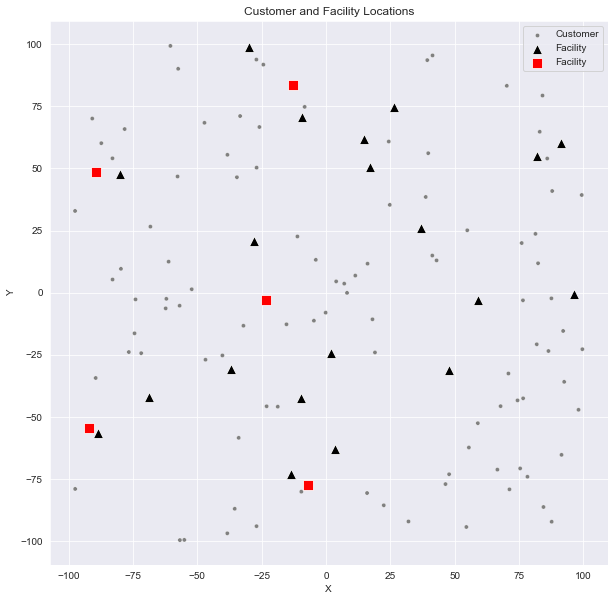

In [9]:
# plot the customers and facilities
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='X', y='Y', data=i_data, size=1, color='grey', legend=False, label="Customer")
sns.scatterplot(x='X', y='Y', data=j_data, s=100, color='black', marker='^', label="Facility")
sns.scatterplot(x='X', y='Y', data=k_data, s=100, color='red', marker='s', label="Facility")
plt.legend()
plt.title('Customer and Facility Locations')

In [10]:
# create distance matrix
eucl = lambda x1, y1, x2, y2: ((x1 - x2)**2 + (y1 - y2)**2)**0.5

i_loc = i_data[['X', 'Y']].values
j_loc = j_data[['X', 'Y']].values
k_loc = k_data[['X', 'Y']].values

dist_ij = np.array([[eucl(i[0],i[1],j[0],j[1]) for j in j_loc] for i in i_loc])
dist_jk = np.array([[eucl(j[0],j[1],k[0],k[1]) for k in k_loc] for j in j_loc ])

In [11]:
# save new data to files
with pd.ExcelWriter('data.xlsx', mode='w') as writer:
    i_data.to_excel(writer, sheet_name='i_data', index=False)
    j_data.to_excel(writer, sheet_name='j_data', index=False)
    k_data.to_excel(writer, sheet_name='k_data', index=False)
    l_data.to_excel(writer, sheet_name='l_data', index=False)
    pd.DataFrame(dist_ij).to_excel(writer, sheet_name='dist_ij', index=False)
    pd.DataFrame(dist_jk).to_excel(writer, sheet_name='dist_jk', index=False)
    
print('Done')

Done
